In [25]:
import pandas as pd

df = pd.read_csv("c:/data/ozone/ozone2.csv")
df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,1,190.000000,7.4,67,41,0
1,5,2,118.000000,8.0,72,36,0
2,5,3,149.000000,12.6,74,12,0
3,5,4,313.000000,11.5,62,18,0
4,5,5,185.931507,14.3,56,42,1


In [26]:
cols = ["Solar.R", "Wind", "Temp"]
X = df[cols]
y = df["Result"]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=10
)

Text(0.5, 0, 'number of clusters')

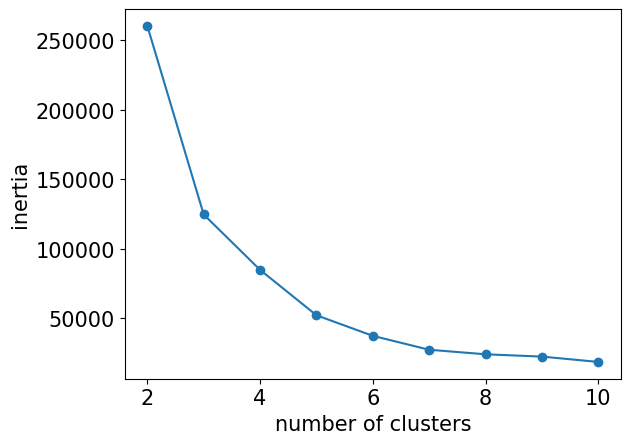

In [28]:
# 최적의 클러스터 갯수를 구하는 방법
# inertia value : 군집화가 된 후 각 중심점에서 군집의 데이터간의 거리를 합산한 값 → 작을수록 응집도가 높은 군집
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

clusters = range(2, 11)
inertias = []  # 중심좌표~각 샘플 사이의 거리 합산

for n in clusters:
    # 모델 생성
    model = KMeans(n_clusters=n, random_state=10)
    model.fit(X_train)
    inertias.append(model.inertia_)

plt.rcParams["font.size"] = 15
plt.plot(clusters, inertias, "-o")
plt.ylabel("inertia")
plt.xlabel("number of clusters")

# 엘보우(elbow) 기법
# inertias 값이 하강하다가 팔꿈치처럼 꺾이는 부분 3  → 따라서 3개의 클러스터로 분류하는 것이 적절함

In [29]:
model = KMeans(n_clusters=3, random_state=10)
print(model)
pred = model.fit_predict(X_train)
#             분석+예측
print(pred[:5])
pred = model.fit_predict(X_test)
print(pred[:5])

KMeans(n_clusters=3, random_state=10)
[1 2 0 2 0]
[2 2 1 2 0]


In [30]:
# 군집화에서는 개별 라벨값보다는 군집이 중요함
# 실루엣 값은 한 클러스터 안의 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한가를 나타냄
# ai : i와 같은 군집에 속한 원소들의 평균 거리
# bi : i와 다른 군집 중 가장 가까운 군집까지의 평균 거리
# (bi - ai) / max(ai,bi)
# 실루엣계수가 클수록 좋은 모형
# 군집의 형상이 복잡하거나 크기의 차이가 많이 나면 비교가 어려운 단점이 있음

from sklearn.metrics import silhouette_score

silhouette_score(X_test, pred)

0.5728844443173017

In [31]:
# 클러스터 갯수를 2로 설정
model = KMeans(n_clusters=2, random_state=10)
print(model)
pred = model.fit_predict(X_train)

print(pred[:5])
pred = model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=2, random_state=10)
[1 0 0 0 0]
[0 0 1 0 0]


In [32]:
silhouette_score(X_test, pred)

0.6729790456272987

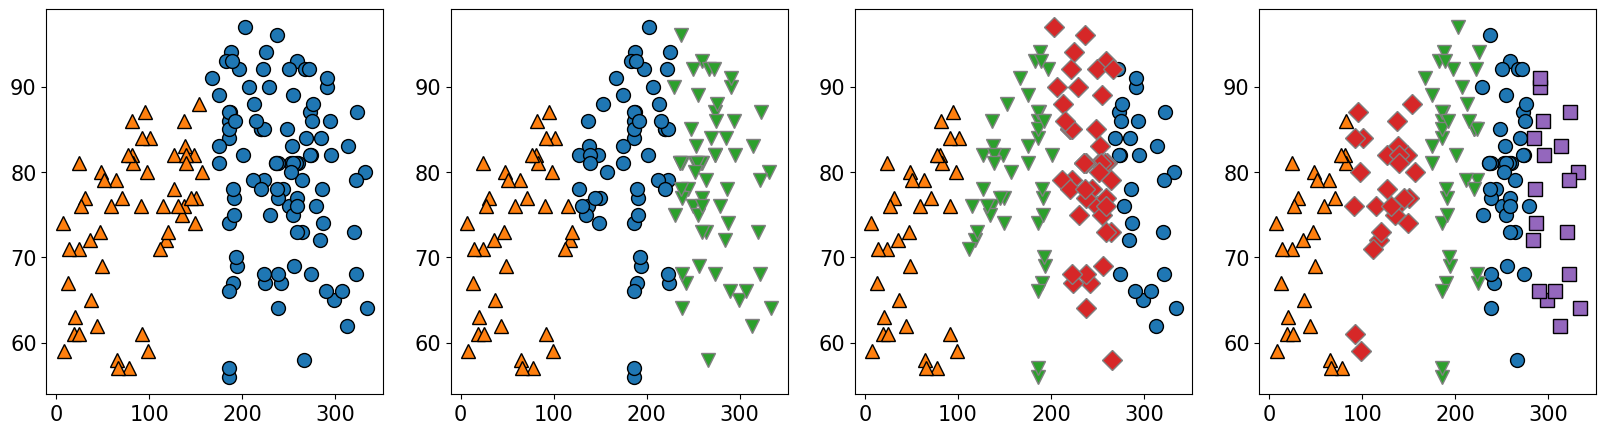

In [33]:
import matplotlib.pyplot as plt
import mglearn

# 같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
# 1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 2,3,4,5개의 클러스터로 나눌 경우
idx = 0

for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_

    mglearn.discrete_scatter(X["Solar.R"], X["Temp"], lbls, ax=axes[idx])
    idx += 1